In [73]:
# Importing libraries needed for the project
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import linregress
import matplotlib.pyplot as plt
import plotly.express as px
from math import ceil #The math.ceil() method rounds a number UP to the nearest integer, if necessary, and returns the result.
from urllib.request import urlopen
import json
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # https://stackoverflow.com/questions/15777951/how-to-suppress-pandas-future-warning

In [74]:
# Load the Excel file into a DataFrame
data = pd.read_excel("./All_time_together.xlsx")

# Save the DataFrame as a CSV file
data.to_csv("./All_time_together.csv", index=False)

# Display the first few rows (optional, just to check the data)
data.head()


,User Name,Time limit for each question,Score(%),Score 1,Attempt Date,Taken Time,What is your gender?,How old are you?,"An object with a mass of 2 kg is lifted to a height of 10 meters. After being released, how much kinetic energy will the object have just before hitting the ground? (Assume g9.8m/s^2 and ignore air resistance)",Answer,...,Time 3,How confident are you?,What are characteristics of polynomial functions and other nonlinear graphs?,Answer.3,Time 4,How confident are you in your answers.2,The collapse of Communist rule throughout Eastern Europe occurred peacefully in all of the following countries EXCEPT,Answer.4,Time 5,How confident are you in your answers.3
0,Guest1,2 min,14.285714,1,11-6-2024 12:43:26 PM,0:3:27,Female,28,Incorrect,NaN,...,00:02:00,Not at all confident,Correct,A polynomial function can be represented in fa...,00:01:50,Not at all confident,Incorrect,Hungary,00:02:00,Not at all confident
1,Guest2,2 min,14.285714,1,11-6-2024 09:56:16 AM,0:3:3,Female,25,Correct,196 J,...,00:01:16,Not at all confident,Incorrect,Polynomial functions are linear and have only ...,00:00:23,Not at all confident,Incorrect,NaN,00:00:02,Not at all confident
2,Guest3,2 min,14.285714,1,11-6-2024 09:40:01 AM,0:4:39,Male,26,Incorrect,NaN,...,00:01:59,Not at all confident,Incorrect,Rational functions have their input in the num...,00:01:48,Slightly confident,Incorrect,East Germany,00:01:54,Not at all confident
3,Guest4,2 min,14.285714,1,11-6-2024 09:25:58 AM,0:3:7,Male,23,Incorrect,98 J,...,00:00:33,Slightly confident,Correct,A polynomial function can be represented in fa...,00:01:24,Slightly confident,Incorrect,Czechoslovakia,00:01:54,Not at all confident
4,Guest5,2 min,28.571428,1,11-6-2024 09:11:37 AM,0:3:3,Male,22,Correct,196 J,...,00:00:20,Extremely confident,Correct,A polynomial function can be represented in fa...,00:00:55,Extremely confident,Correct,Romania,00:01:55,Quite confident


In [75]:
# Calculate the total score from the two score columns
data['Total_Score'] = data['Score 1'] + data['Score 2']

# Calculate % of total score
data['Total_Score_%'] = (data['Total_Score'] / 5) * 100

# Display all the scores
data[['Score 1', 'Score 2', 'Total_Score', 'Total_Score_%']]

,Score 1,Score 2,Total_Score,Total_Score_%
0,1,1,2,40.0
1,1,1,2,40.0
2,1,1,2,40.0
3,1,2,3,60.0
4,1,3,4,80.0
5,1,3,4,80.0
6,0,2,2,40.0
7,1,3,4,80.0
8,1,2,3,60.0
9,2,3,5,100.0


In [76]:
# Convert the time columns to seconds and sum them
def time_to_seconds(time_str):
    h, m, s = map(int, time_str.split(':'))
    return h * 3600 + m * 60 + s

# Sum the times and make a total time data column
data['Total_Time'] = data[['Time 1', 'Time 2', 'Time 3', 'Time 4', 'Time 5']].applymap(time_to_seconds).sum(axis=1)

# Convert time to Hour, minutes and seconds format
def seconds_to_hms(seconds):
    h = seconds // 3600
    m = (seconds % 3600) // 60
    s = seconds % 60
    return f"{h:02}:{m:02}:{s:02}"

data['Total_Time_HHMMSS'] = data['Total_Time'].apply(seconds_to_hms)

In [77]:
data['Total_Time_HHMMSS']

0     00:08:56
1     00:04:11
2     00:09:29
3     00:06:36
4     00:05:56
5     00:06:38
6     00:06:50
7     00:09:03
8     00:07:40
9     00:06:08
10    00:08:02
11    00:08:47
12    00:02:46
13    00:07:35
14    00:09:02
15    00:11:45
16    00:06:23
17    00:08:41
18    00:12:45
19    00:15:54
20    00:12:34
21    00:09:54
22    00:09:25
23    00:09:15
24    00:05:17
25    00:09:01
26    00:07:09
27    00:08:36
28    00:10:27
29    00:09:46
Name: Total_Time_HHMMSS, dtype: object

In [78]:
# Update the spreadsheet
data.to_excel('updated_file.xlsx', index=False)

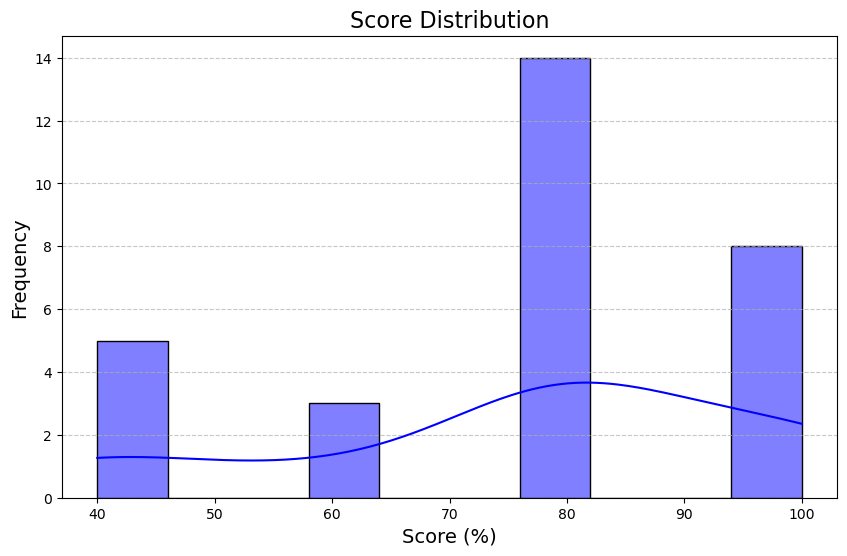

In [79]:
# Create a histogram for score distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Total_Score_%'], bins=10, kde=True, color='blue', edgecolor='black')

# Customize the plot
plt.title('Score Distribution', fontsize=16)
plt.xlabel('Score (%)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

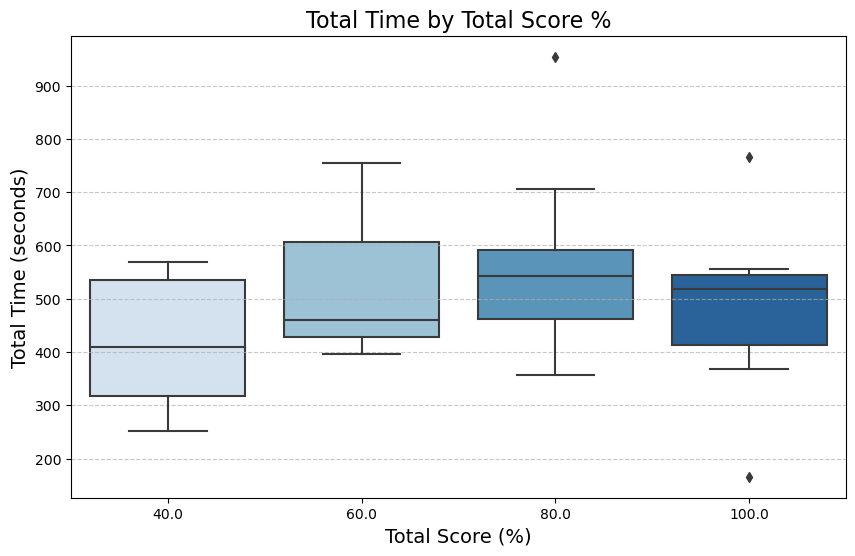

In [80]:
data_cleaned = data.dropna(subset=['Total_Time', 'Total_Score_%'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='Total_Score_%', y='Total_Time', data=data_cleaned, palette='Blues')
plt.title('Total Time by Total Score %', fontsize=16)
plt.xlabel('Total Score (%)', fontsize=14)
plt.ylabel('Total Time (seconds)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


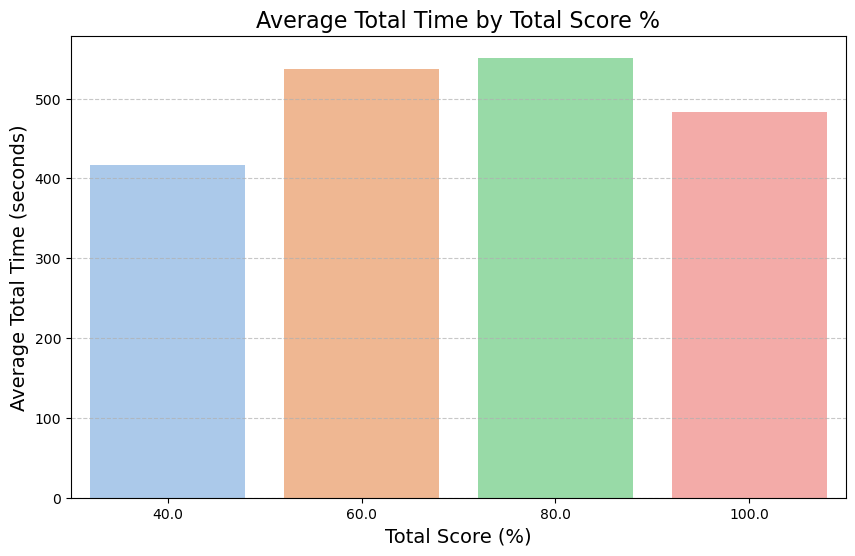

In [81]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Total_Score_%', y='Total_Time', data=data_cleaned, ci=None, palette='pastel')
plt.title('Average Total Time by Total Score %', fontsize=16)
plt.xlabel('Total Score (%)', fontsize=14)
plt.ylabel('Average Total Time (seconds)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

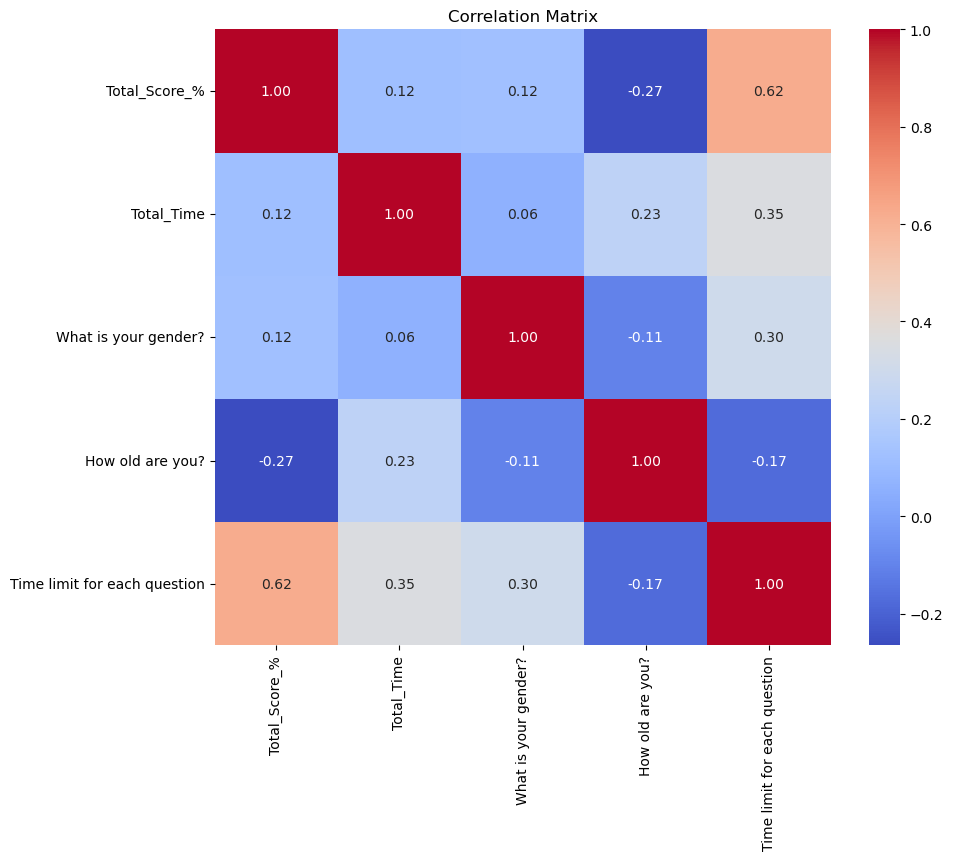

In [82]:
# Extract the relevant columns for the correlation matrix
correlation_columns_reuploaded = [
    "Total_Score_%",
    "Total_Time",
    "What is your gender?",
    "How old are you?",
    "Time limit for each question"
]

# Prepare the data for correlation matrix
correlation_data = data[correlation_columns_reuploaded].copy()

# Map categorical data to numerical values for correlation
# Map gender to numerical values
correlation_data["What is your gender?"] = correlation_data["What is your gender?"].map({"Male": 0, "Female": 1})

# Map time limit to numerical values
correlation_data["Time limit for each question"] = correlation_data["Time limit for each question"].str.extract('(\d+)').astype(float)

# Convert Total Time to numeric (seconds)
correlation_data["Total_Time"] = pd.to_numeric(correlation_data["Total_Time"], errors="coerce")

# Drop rows with missing values
correlation_data = correlation_data.dropna()

# Compute the correlation matrix
correlation_matrix = correlation_data.corr()

# Visualize the correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Matrix")
plt.show()

Correlation matrix skulle have vist all tallene i plottet, som den vises for neden, ved ikke hvorfor, den ikke gør det.

In [83]:
correlation_matrix

,Total_Score_%,Total_Time,What is your gender?,How old are you?,Time limit for each question
Total_Score_%,1.000000,0.117893,0.120470,-0.265500,0.623302
Total_Time,0.117893,1.000000,0.058646,0.231495,0.354438
What is your gender?,0.120470,0.058646,1.000000,-0.106360,0.301511
How old are you?,-0.265500,0.231495,-0.106360,1.000000,-0.172276
Time limit for each question,0.623302,0.354438,0.301511,-0.172276,1.000000


In [84]:
data["Time limit for each question"] = data["Time limit for each question"].replace(
    {"2 min": "2 Min", "4 min": "4 Min", "No limit": "No Time Limit"}
)

boxplot_overall_data = data[["Time limit for each question", "Total_Score_%"]]

question_columns = [
    "An object with a mass of 2 kg is lifted to a height of 10 meters. After being released, how much kinetic energy will the object have just before hitting the ground? (Assume g9.8m/s^2 and ignore air resistance)",
    "Which hormone is responsible for triggering ovulation during the menstrual cycle?",
    "Which of the following is equivalent to",
    "What are characteristics of polynomial functions and other nonlinear graphs?",
    "The collapse of Communist rule throughout Eastern Europe occurred peacefully in all of the following countries EXCEPT"
]

boxplot_question_data = {}

for idx, col in enumerate(question_columns, start=1):
    boxplot_question_data[f"Question {idx}"] = data[["Time limit for each question", col]].copy()
    # Map correctness to numerical values for plotting
    boxplot_question_data[f"Question {idx}"][col] = boxplot_question_data[f"Question {idx}"][col].map(
        {"Correct": 1, "Incorrect": 0}
    )

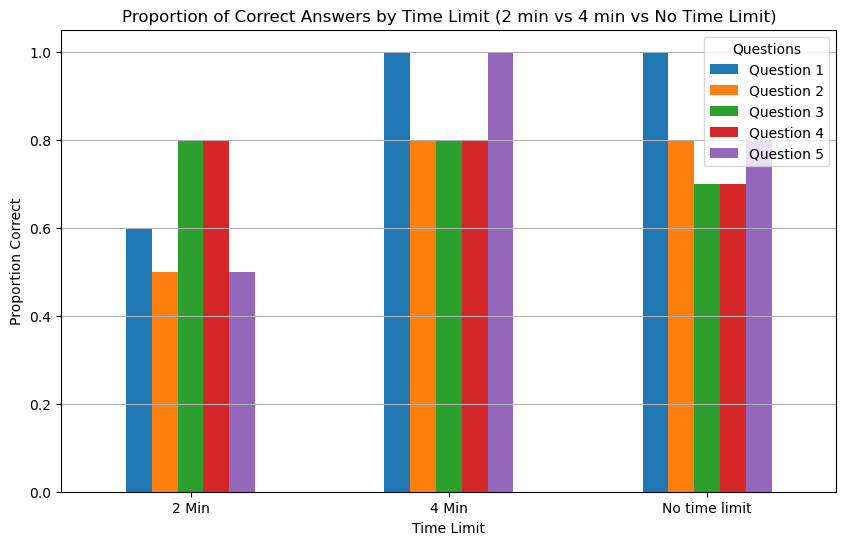

In [85]:
# Proportions of correct answers by time limit for each question
proportions_by_time_limit = {
    f"Question {idx + 1}": data.groupby("Time limit for each question")[data.columns[1]].mean()
    for idx, (question, data) in enumerate(boxplot_question_data.items())
}

# Converted to dataframe for plotting purposes
proportions_df = pd.DataFrame(proportions_by_time_limit).reset_index()
proportions_df = proportions_df.rename(columns={"Time limit for each question": "Time Limit"})

# Plot grouped bar chart
proportions_df.set_index("Time Limit").plot(kind="bar", figsize=(10, 6))
plt.title("Proportion of Correct Answers by Time Limit (2 min vs 4 min vs No Time Limit)")
plt.ylabel("Proportion Correct")
plt.xlabel("Time Limit")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.legend(title="Questions")
plt.show()


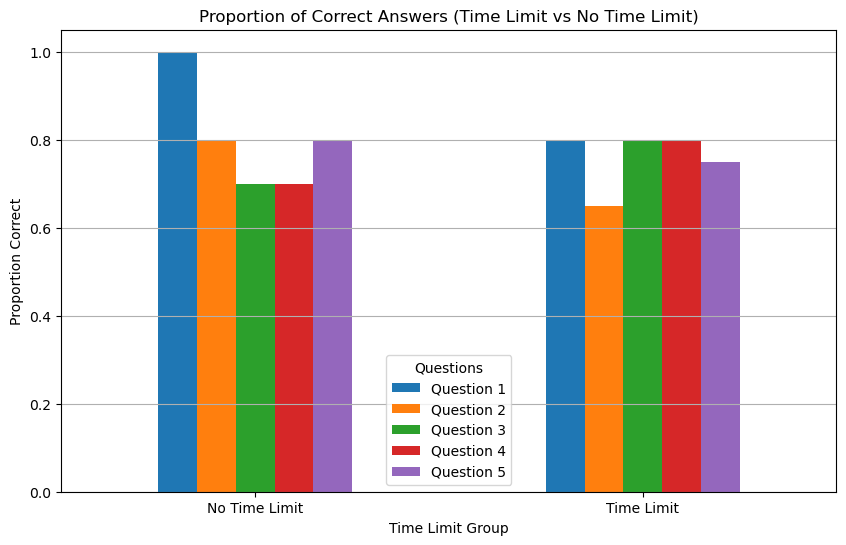

In [86]:
# 2 min and 4 min combined called time limit
for question, data in boxplot_question_data.items():
    data["Time Limit Group"] = data["Time limit for each question"].apply(
        lambda x: "Time Limit" if x in ["2 Min", "4 Min"] else "No Time Limit"
    )

# Proportions of correct answers for the grouped time limits
proportions_grouped_time_limit = {
    f"{question}": data.groupby("Time Limit Group")[data.columns[1]].mean()
    for question, data in boxplot_question_data.items()
}

# Converted to dataframe for plotting purposes
proportions_grouped_df = pd.DataFrame(proportions_grouped_time_limit).reset_index()
proportions_grouped_df = proportions_grouped_df.rename(columns={"Time Limit Group": "Time Limit"})

# Plot grouped bar chart for correctness proportions (grouped time limits)
proportions_grouped_df.set_index("Time Limit").plot(kind="bar", figsize=(10, 6))
plt.title("Proportion of Correct Answers (Time Limit vs No Time Limit)")
plt.ylabel("Proportion Correct")
plt.xlabel("Time Limit Group")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.legend(title="Questions")
plt.show()


In [87]:
from scipy.stats import fisher_exact

# Explicitly filter and count "No time limit" entries for correctness
time_limit_correct = (
    sum(
        data[data["Time limit for each question"] == "2 Min"][data.columns[1]].sum()
        for data in boxplot_question_data.values()
    )
    + sum(
        data[data["Time limit for each question"] == "4 Min"][data.columns[1]].sum()
        for data in boxplot_question_data.values()
    )
)
time_limit_incorrect = (
    sum(
        len(data[data["Time limit for each question"] == "2 Min"]) - data[data["Time limit for each question"] == "2 Min"][data.columns[1]].sum()
        for data in boxplot_question_data.values()
    )
    + sum(
        len(data[data["Time limit for each question"] == "4 Min"]) - data[data["Time limit for each question"] == "4 Min"][data.columns[1]].sum()
        for data in boxplot_question_data.values()
    )
)

no_time_limit_correct = sum(
    data[data["Time limit for each question"] == "No time limit"][data.columns[1]].sum()
    for data in boxplot_question_data.values()
)
no_time_limit_total = sum(
    len(data[data["Time limit for each question"] == "No time limit"])
    for data in boxplot_question_data.values()
)
no_time_limit_incorrect = no_time_limit_total - no_time_limit_correct

# Rebuild the contingency table with corrected data
fisher_table_corrected = [
    [time_limit_correct, no_time_limit_correct],
    [time_limit_incorrect, no_time_limit_incorrect],
]

# Perform Fisher's Exact Test with the corrected data
odds_ratio_corrected, p_value_corrected = fisher_exact(fisher_table_corrected)

# Display the corrected results
fisher_results_corrected = {
    "Fisher's Exact Test Table": fisher_table_corrected,
    "Odds Ratio": odds_ratio_corrected,
    "p-value": p_value_corrected,
}
fisher_results_corrected

{"Fisher's Exact Test Table": [[76, 40], [24, 10]],
 'Odds Ratio': 0.7916666666666666,
 'p-value': 0.6810792018070683}

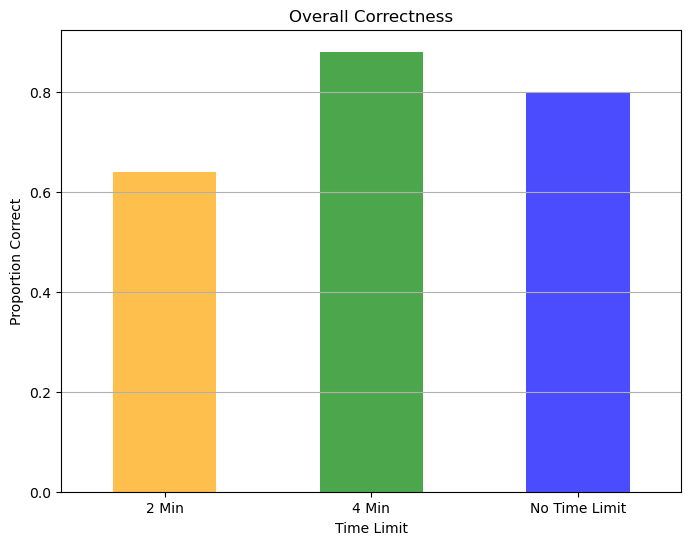

In [88]:
# Overall correctness proportions for 2 Min, 4 Min, and No Time Limit
overall_correctness_detailed = pd.concat(
    [data.groupby("Time limit for each question")[data.columns[1]].mean() for data in boxplot_question_data.values()],
    axis=1,
).mean(axis=1)

# Barplot for overall correctness
overall_correctness_detailed.plot(kind="bar", figsize=(8, 6), color=["orange", "green", "blue"], alpha=0.7)
plt.title("Overall Correctness")
plt.ylabel("Proportion Correct")
plt.xlabel("Time Limit")
plt.xticks([0, 1, 2], ["2 Min", "4 Min", "No Time Limit"], rotation=0)
plt.grid(axis="y")
plt.show()


In [89]:
import numpy as np

# Define a function to compute the proportion of correct answers for each time limit group
def compute_correctness_proportions(data, time_limits):
    proportions = []
    for time_limit in time_limits:
        correct = sum(
            data[data["Time limit for each question"] == time_limit][data.columns[1]].sum()
            for data in boxplot_question_data.values()
        )
        total = sum(
            len(data[data["Time limit for each question"] == time_limit])
            for data in boxplot_question_data.values()
        )
        proportions.append(correct / total if total > 0 else 0)
    return proportions

# Time limit groups to analyze
time_limits = ["2 Min", "4 Min", "No time limit"]

# Number of bootstrap iterations
n_bootstraps = 10000

# Perform bootstrapping
bootstrapped_proportions = []
for _ in range(n_bootstraps):
    # Resample the dataset with replacement
    resampled_data = data.sample(frac=1, replace=True)
    
    # Compute correctness proportions for each group
    proportions = compute_correctness_proportions(resampled_data, time_limits)
    bootstrapped_proportions.append(proportions)

# Convert to a NumPy array for easier processing
bootstrapped_proportions = np.array(bootstrapped_proportions)

# Compute confidence intervals (95% CI)
ci_lower = np.percentile(bootstrapped_proportions, 2.5, axis=0)
ci_upper = np.percentile(bootstrapped_proportions, 97.5, axis=0)

# Aggregate results
bootstrap_results = {
    "Time Limit": time_limits,
    "Mean Proportion": bootstrapped_proportions.mean(axis=0),
    "95% CI Lower": ci_lower,
    "95% CI Upper": ci_upper,
}

# Display results
import pandas as pd
results_df = pd.DataFrame(bootstrap_results)

In [90]:
results_df

,Time Limit,Mean Proportion,95% CI Lower,95% CI Upper
0,2 Min,0.64,0.64,0.64
1,4 Min,0.88,0.88,0.88
2,No time limit,0.80,0.80,0.80
